<a href="https://colab.research.google.com/github/vee234o/Cos-201-Assignment-MLR-/blob/main/COS_201_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [66]:
df = pd.read_csv('Student_Performance.csv')

In [67]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [57]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


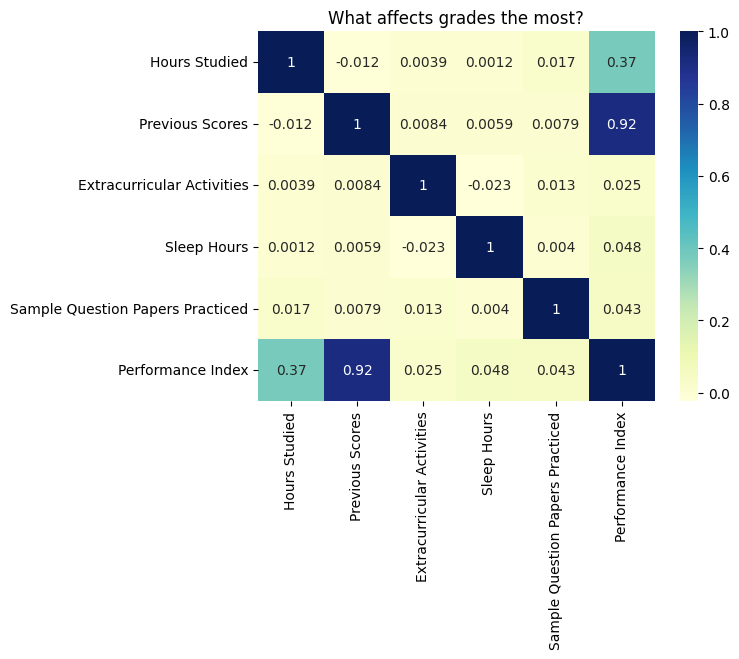

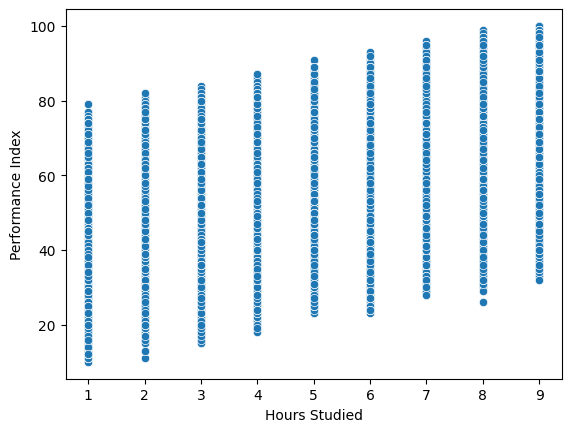

In [68]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('What affects grades the most?')
plt.show()

sns.scatterplot(x='Hours Studied', y='Performance Index', data=df)
plt.show()

In [77]:
df.corr()['Performance Index'].sort_values(ascending=False)

,Performance Index
Performance Index,1.000000
Previous Scores,0.915189
Hours Studied,0.373730
Sleep Hours,0.048106
Sample Question Papers Practiced,0.043268
Extracurricular Activities,0.024525


In [70]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f"R2 Score: {metrics.r2_score(y_test, predictions):.4f}")
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, predictions):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(y_test, predictions)):.2f}")

R2 Score: 0.9890
Mean Absolute Error (MAE): 1.61
Root Mean Squared Error (RMSE): 2.02


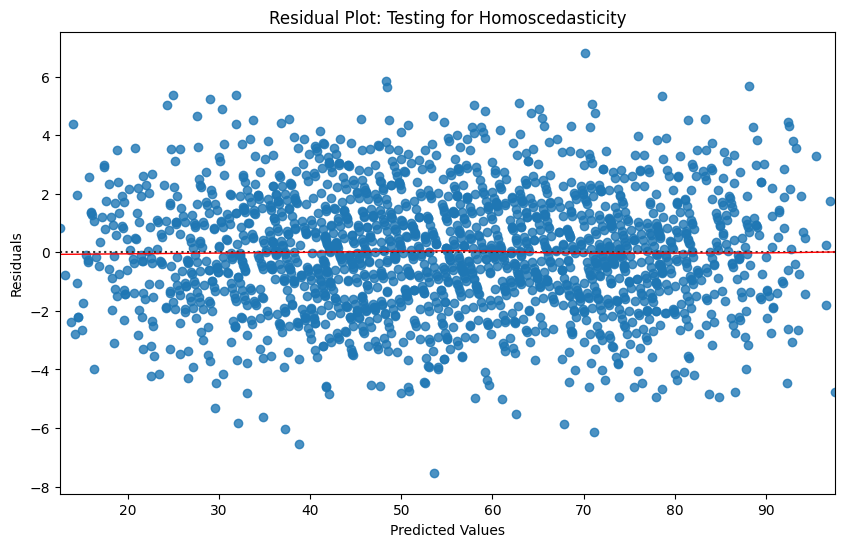

In [72]:
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=y_test - predictions, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Testing for Homoscedasticity')
plt.show()

The Multiple Linear Regression model successfully predicts student performance with an R-squared of  0.9890. Analysis of the Residual Plot shows no clear pattern in errors, confirming that the model's assumptions are valid. The RMSE of 2.02 suggests that our predictions are accurate within a small margin of the actual student performance index.

The most significant predictor was Previous Scores, followed closely by Hours Studied. This confirms the hypothesis that consistent academic history and time investment are the primary drivers of success, while factors like sleep had a positive but smaller impact.